# Time Series Analysis: Seminar 1

- 6 seminars by Lyubov Gorbunova

- 6 lectures by Boris Demeshev


### Assessment criteria

- **(10%+10%)** HW1 + HW2  
- **(5%+5%)** DataCamp course1 + DataCamp course2
- **(30%)** Group project
- **(40%)** Final Exam  
- **(10%)** Optional DataCamp courses (max 4): 4% + 3% + 2% + 1%

### Deadlines and dates

- **(10%+10%)** 11.02.21 23:00 + 11.03.21 23:00  
- **(5%+5%)** 28.01.21 23:00 + 24.02.21 23:00   
- **(30%)** 28.03.21 23:00  
- **(40%)** 29.03.21  
- **(10%)** 28.03.21 23:00 

### Deadlines and dates

- **28.01.21 23:00** DataCamp course1 (5%)
- **11.02.21 23:00** HW1 (10%)
- **24.02.21 23:00** DataCamp course2 (5%)
- **11.03.21 23:00** HW2 (10%)
- **28.03.21 23:00** Group project (30%)
- **28.03.21 23:00** Optional DataCamp courses (up to 10%)
- **29.03.21**       Final Exam (40%)

telegram chat: 
https://t.me/joinchat/FipRKqd4QQo0z9qP

instructions for DataCamp courses and home assignments:
https://docs.google.com/spreadsheets/d/1sXbu4sHpwO5oxRJGWDElse2O03Vf-a4bReIKBd8x7Gg/edit#gid=0

- Jupyter notebook
- Google Colab
- Deepnote
- ...

#### Cell types

- code cells, to add comments use #
- markdown cells: text, LateX

In [186]:
from numpy.random import normal 
normal()

1.5316033746645377

In [187]:
import numpy as np
npr.normal()

-0.8158734517578549

In [188]:
import numpy
numpy.random.normal()

0.484700000731042

**from** module **import** function

function(agt)

OR

**import** module **as** mdl

mdl.function(agt)

OR

**import** module 

module.function(agt)

In [189]:
?numpy.random.normal()

### Install and import modules, functions

In [ ]:
!pip install sktime

In [190]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

### Plot a series

In [191]:
y=load_airline()

In [199]:
y.head(2)

Period
1949-01    112.0
1949-02    118.0
Freq: M, Name: Number of airline passengers, dtype: float64

#### descriptive statistics

In [196]:
y.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Number of airline passengers, dtype: float64

### Plot data

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9433da82b0>)

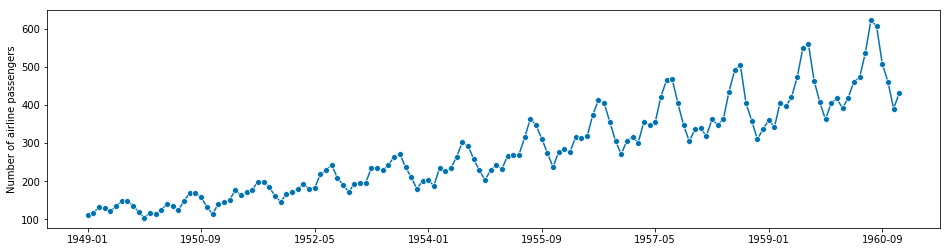

In [198]:
plot_series(load_airline())

### Daily, monthly, quarterly, semi-annual or annual data?

# Forecasting!!!!

### Test and Train split

#### Why do we need it?

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9433e4d3c8>)

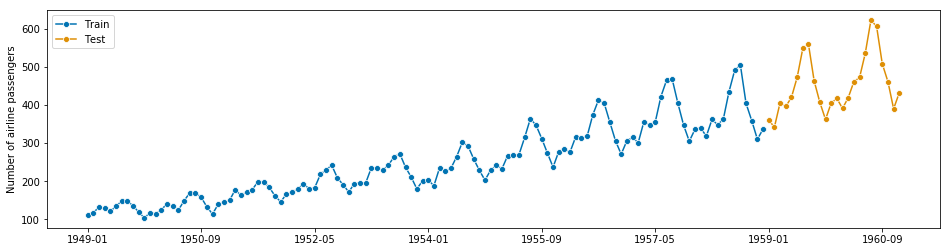

In [208]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train, y_test = temporal_train_test_split(y, test_size=24)
plot_series(y_train, y_test, labels=['Train', 'Test'])

## What forecasting models do you know?

### Naive forecaster (1)

$\hat{y}_{t+1}=y_t$

In [209]:
from sktime.forecasting.naive import NaiveForecaster
naive_1_forecaster=NaiveForecaster()
naive_1_forecaster.fit(y_train)

NaiveForecaster()

In [212]:
horizon=np.arange(1, 25)
y_pred=naive_1_forecaster.predict(horizon)

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x9433ec00b8>)

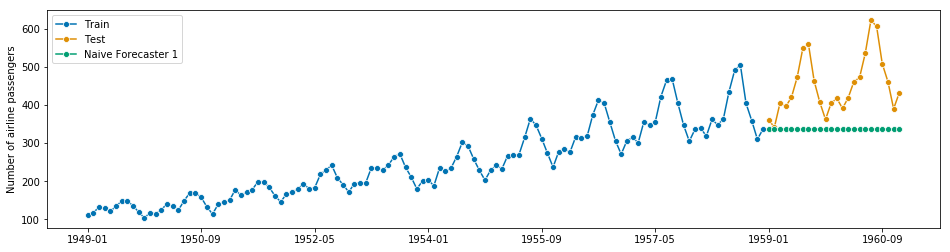

In [213]:
plot_series(y_train, y_test, y_pred, labels=['Train', 'Test', 'Naive Forecaster 1'])

#### Is it a good forecaster?

### Naive forecaster (2) 

$$\hat{y}_{t+1}=y_{t-11}$$

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x94340e2b00>)

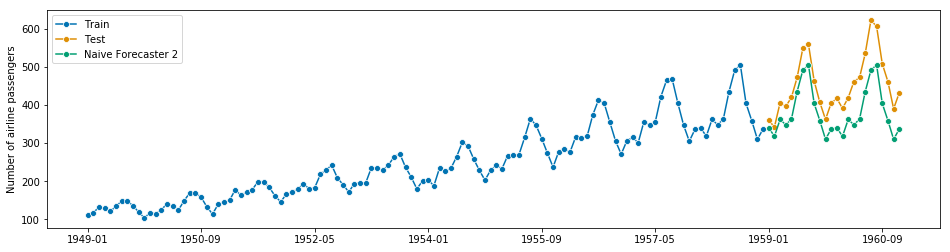

In [214]:
naive_2_forecaster=NaiveForecaster(sp=12)
naive_2_forecaster.fit(y_train)
y_pred2=naive_2_forecaster.predict(horizon)
plot_series(y_train, y_test, y_pred2, labels=['Train', 'Test', 'Naive Forecaster 2'])

### ETS(AAA)

Find more information on [Forecasting principles and practice](https://otexts.com/fpp3/ets.html).

## Task 1

1. Choose a time series and a forecasting horizon
2. Naive forecast (1)
3. Naive forecast (2)
4. ETS (AAA) model 

### Alternative 1: yahoo finance

In [40]:
!pip install yfinance 

In [165]:
import yfinance as yf
prices = yf.download(['KO','PEP','AAPL', 'BIIB'],'2014-06-20','2020-09-20')

[*********************100%***********************]  4 of 4 downloaded


Text(0.5,0,'Date')

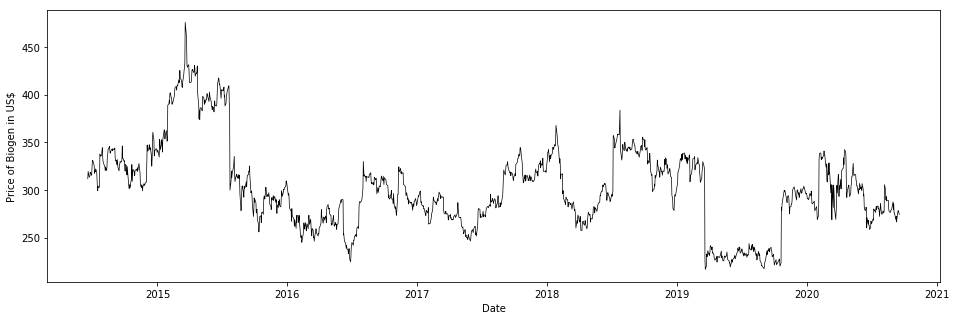

In [171]:
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(16, 5))
plt.plot(prices['Adj Close']['BIIB'], color='black', linewidth=0.7, label="Coca Cola")
#plt.gca().xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%D"))

plt.ylabel('Price of Biogen in US$')

plt.xlabel('Date')
# plt.savefig('pic.png')

### Alternative 2: Monthly anti-diabetic drug sales in Australia from 1992 to 2008

In [105]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')

(<Figure size 1152x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x94331d7d68>)

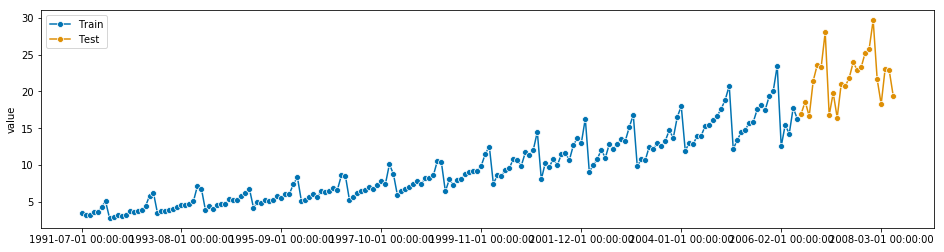

In [163]:
y_train, y_test = temporal_train_test_split(df['value'], test_size=24)
plot_series(y_train, y_test, labels=['Train', 'Test'])